In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = pd.read_csv('titanic.csv')
data.shape

(891, 12)

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data = data.drop(['Name', 'Ticket','Cabin'], axis=1)

In [5]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [6]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [8]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
# Replace null values with zero in the specific column
data['Age'] = data['Age'].fillna(0)

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [11]:
data.shape

(891, 9)

In [12]:
# Encode categorical data
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [13]:
# Scale numerical data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# Split the data into training and testing sets
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

In [16]:
probability = model.predict_proba(X_test)

In [17]:
predictions_probability = probability[:, 1]

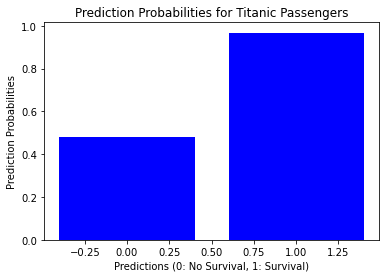

In [18]:
import matplotlib.pyplot as plt

plt.bar(predictions, predictions_probability, color='blue')
plt.xlabel('Predictions (0: No Survival, 1: Survival)')
plt.ylabel('Prediction Probabilities')
plt.title('Prediction Probabilities for Titanic Passengers')
plt.show()


In [20]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", round(accuracy,2)*100)


Accuracy: 80.0


In [36]:
data.insert(4,"Predictictions",model.predict(X))
data.head()


,PassengerId,Survived,Pclass,Name,Predictictions,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,0.149065,1,0,PC 17599,-0.097180,C85,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,-0.043230,1,0,113803,-0.335997,C123,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,1,1.174636,0,0,17463,-0.352250,E46,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,0,-2.030273,1,1,PP 9549,-0.814070,G6,2
11,12,1,1,"Bonnell, Miss. Elizabeth",1,0,1.431029,0,0,113783,-0.684702,C103,2


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Titanic dataset from a CSV file
data = pd.read_csv('C:/Users/Talha/Downloads/titanic.csv')

# Prepare the data for machine learning
# Handling missing values
data.dropna(inplace=True)

# Encode categorical data
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Scale numerical data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# Split the data into training and testing sets
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)  # Changed X_train and y_train to X and y

# Make predictions on the entire dataset
predictions = model.predict(X)  # Changed X_test to X

# Insert predictions into the DataFrame
data.insert(4, "Predictions", predictions)

# Print the first few rows of the DataFrame
print(data.head())



    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name  Predictions  Sex  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...            1    0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)            1    0   
6                             McCarthy, Mr. Timothy J            0    1   
10                    Sandstrom, Miss. Marguerite Rut            1    0   
11                           Bonnell, Miss. Elizabeth            1    0   

         Age  SibSp  Parch    Ticket      Fare Cabin  Embarked  
1   0.149065      1      0  PC 17599 -0.097180   C85         0  
3  -0.043230      1      0    113803 -0.335997  C123         2  
6   1.174636      0      0     17463 -0.352250   E46         2  
10 -2.030273      1      1   PP 9549 -0.814070    G6         2  
1

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

 # Load the Titanic dataset from a CSV file
data = pd.read_csv('C:/Users/Talha/Downloads/titanic.csv')

# Prepare the data for machine learning
# Handle missing values
data.dropna(inplace=True)

# Encode categorical data
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Scale numerical data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# Split the data into training and testing sets
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)
data.insert(4,"Predictictions",model.predict(X))
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)



Accuracy: 0.7837837837837838
